In [9]:
import numpy as np
import yaml
import csv
from pathlib import Path

import optimizer

In [10]:
INPUT_FILE = "../input/input.yaml"
MACHINE_PROCESS_TIME = "../input/machine_process_time.csv"
MACHINE_LAYOUT = "../input/machine_layout.csv"

READ INPUT DATA

In [11]:
input_set = {
    'input_data': {},
    'machine_process_time': [],
    'machine_layout_mtx': []
}

# Read the input file
with open(INPUT_FILE, 'r') as file:
    input_set['input_data'] = yaml.safe_load(file)

# Read machine configuration
with open(MACHINE_PROCESS_TIME, "r") as file:
    reader = csv.reader(file, delimiter=",")
    result = np.array(list(reader)).astype("float")
    input_set['machine_process_time'] = result[0]

with open(MACHINE_LAYOUT, "r") as file:
    reader = csv.reader(file, delimiter=",")
    result = np.array(list(reader)).astype("float")
    input_set['machine_layout_mtx'] = result

assert len(input_set['machine_process_time']) == input_set['input_data']['num_machine'],\
    ("INPUT ERROR: the number of machine and the process time data is not match")

assert len(input_set['machine_layout_mtx']) == input_set['input_data']['num_machine'],\
    ("INPUT ERROR: the number of machine and the layout data is not match")

print("[Scheduler] Init: Get input successfully !!!")
print(f"Number of job: {input_set['input_data']['num_job']}")
print(f"Number of AGV: {input_set['input_data']['num_AGV']}")
print(f"Number of machine: {input_set['input_data']['num_machine']}")
print(f"Machine processing time: {input_set['machine_process_time']}")
print(f"Distance between machines:")
print(input_set['machine_layout_mtx'])

[Scheduler] Init: Get input successfully !!!
Number of job: 4
Number of AGV: 2
Number of machine: 6
Machine processing time: [ 6.  7. 17.  9. 20. 13.]
Distance between machines:
[[0. 3. 4. 5. 6. 7.]
 [3. 0. 1. 2. 3. 4.]
 [4. 1. 0. 1. 2. 3.]
 [5. 2. 1. 0. 1. 2.]
 [6. 3. 2. 1. 0. 1.]
 [7. 4. 3. 2. 1. 0.]]


Create optimizer and solve

In [12]:
optimize_engine = optimizer.MILPOptimizer(input_set)
optimize_engine.solve()

- New operation of job 1 in machine 1 with process time:                       6.0
- New operation of job 2 in machine 1 with process time:                       6.0
- New operation of job 3 in machine 1 with process time:                       6.0
- New operation of job 4 in machine 1 with process time:                       6.0
- New operation of job 1 in machine 2 with process time:                       7.0
- New operation of job 2 in machine 2 with process time:                       7.0
- New operation of job 3 in machine 2 with process time:                       7.0
- New operation of job 4 in machine 2 with process time:                       7.0
- New operation of job 1 in machine 3 with process time:                       17.0
- New operation of job 2 in machine 3 with process time:                       17.0
- New operation of job 3 in machine 3 with process time:                       17.0
- New operation of job 4 in machine 3 with process time:                       17.0


Result

 ====================== RESULT ======================
 - Objective value (makespan): 138.99999998599998
 - Starting time of the all operations: 
 - - Machine 1: 
 - - - Job 1: 53.0
 - - - Job 2: 17.0
 - - - Job 3: 0.0
 - - - Job 4: 23.0
 - - Machine 2: 
 - - - Job 1: 62.0
 - - - Job 2: 26.0
 - - - Job 3: 9.0
 - - - Job 4: 33.0
 - - Machine 3: 
 - - - Job 1: 76.999999986
 - - - Job 2: 34.0
 - - - Job 3: 17.0
 - - - Job 4: 51.0
 - - Machine 4: 
 - - - Job 1: 94.999999986
 - - - Job 2: 55.0
 - - - Job 3: 35.0
 - - - Job 4: 69.0
 - - Machine 5: 
 - - - Job 1: 104.999999986
 - - - Job 2: 65.0
 - - - Job 3: 45.0
 - - - Job 4: 85.0
 - - Machine 6: 
 - - - Job 1: 125.999999986
 - - - Job 2: 86.0
 - - - Job 3: 66.0
 - - - Job 4: 106.0
 - AGV tasks and starting time of the all transportation: 
 - - Machine 2: 
 - - - Job 1 by AGV 1:                       59.0
 - - - Job 2 by AGV 1:                       23.0
 - - - Job 3 by AGV 1:                       6.0
 - - - Job 4 by AGV 2:                 

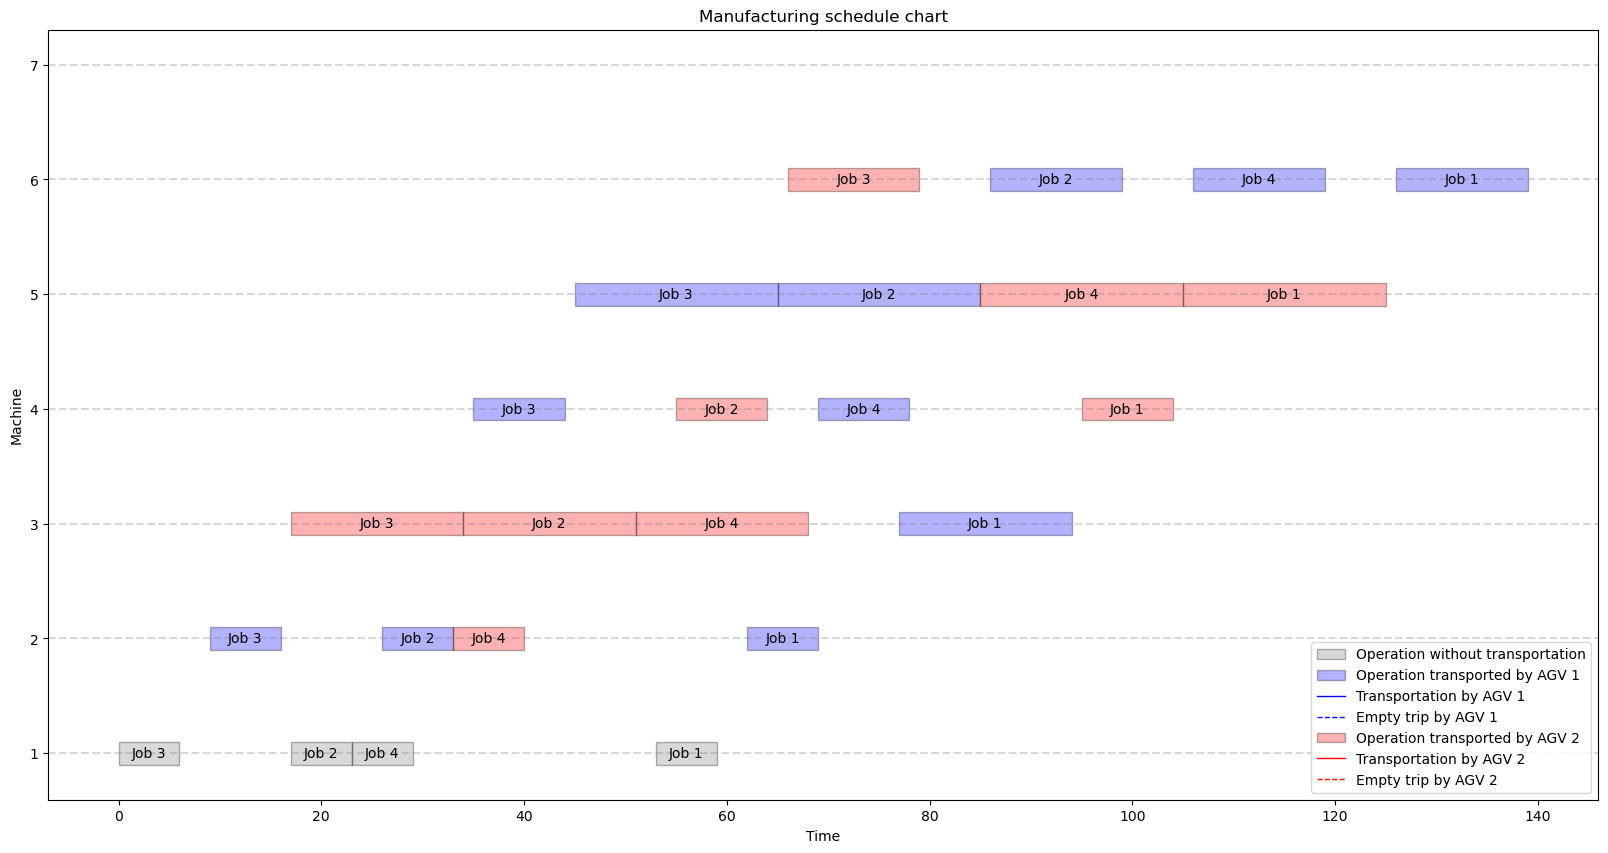

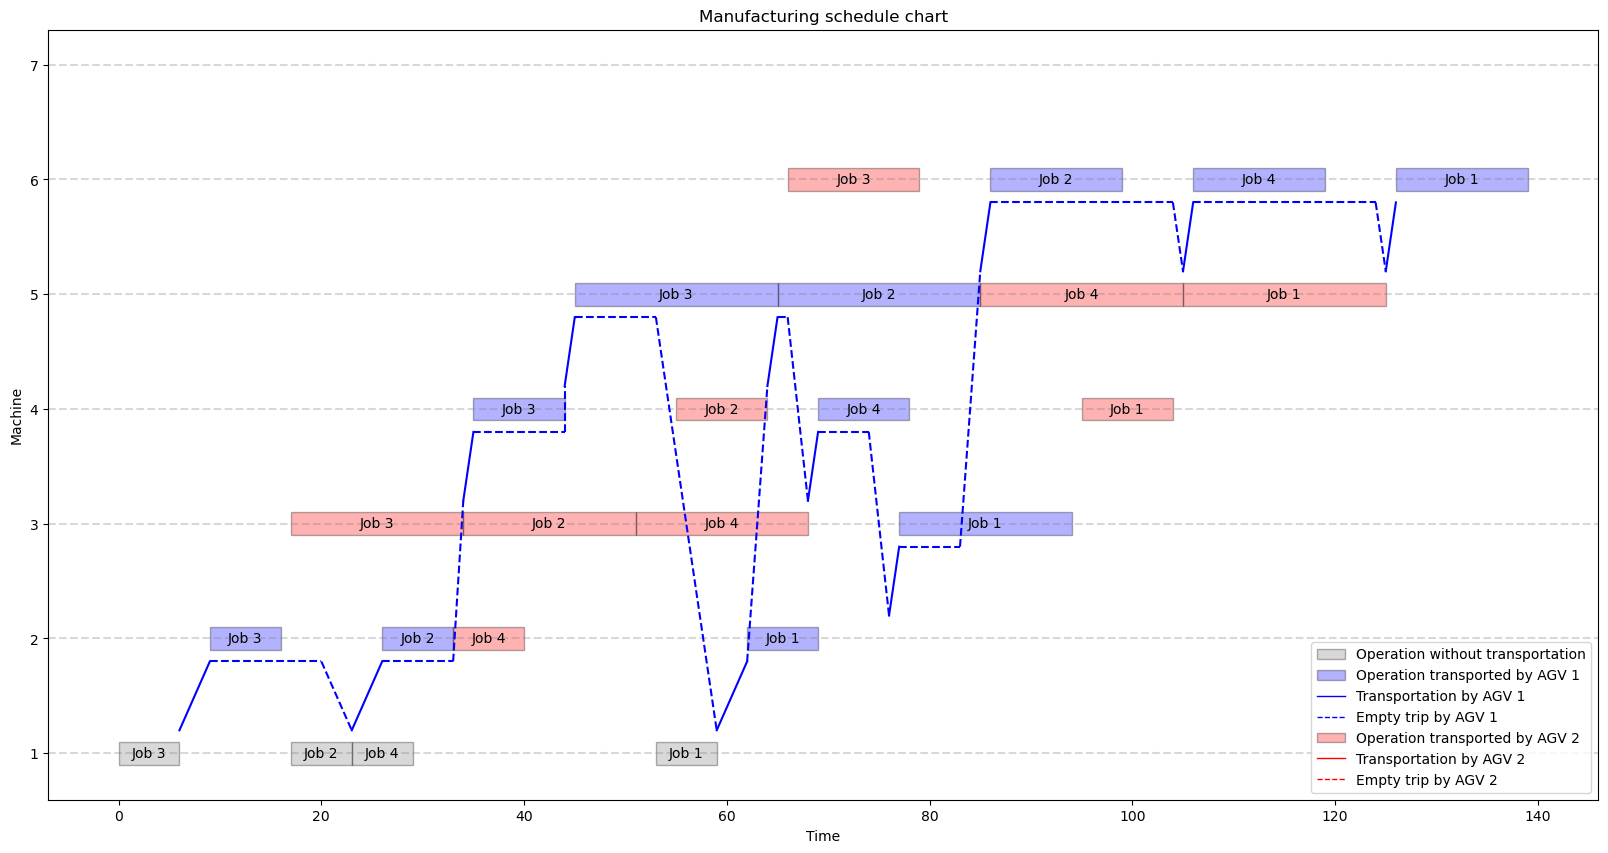

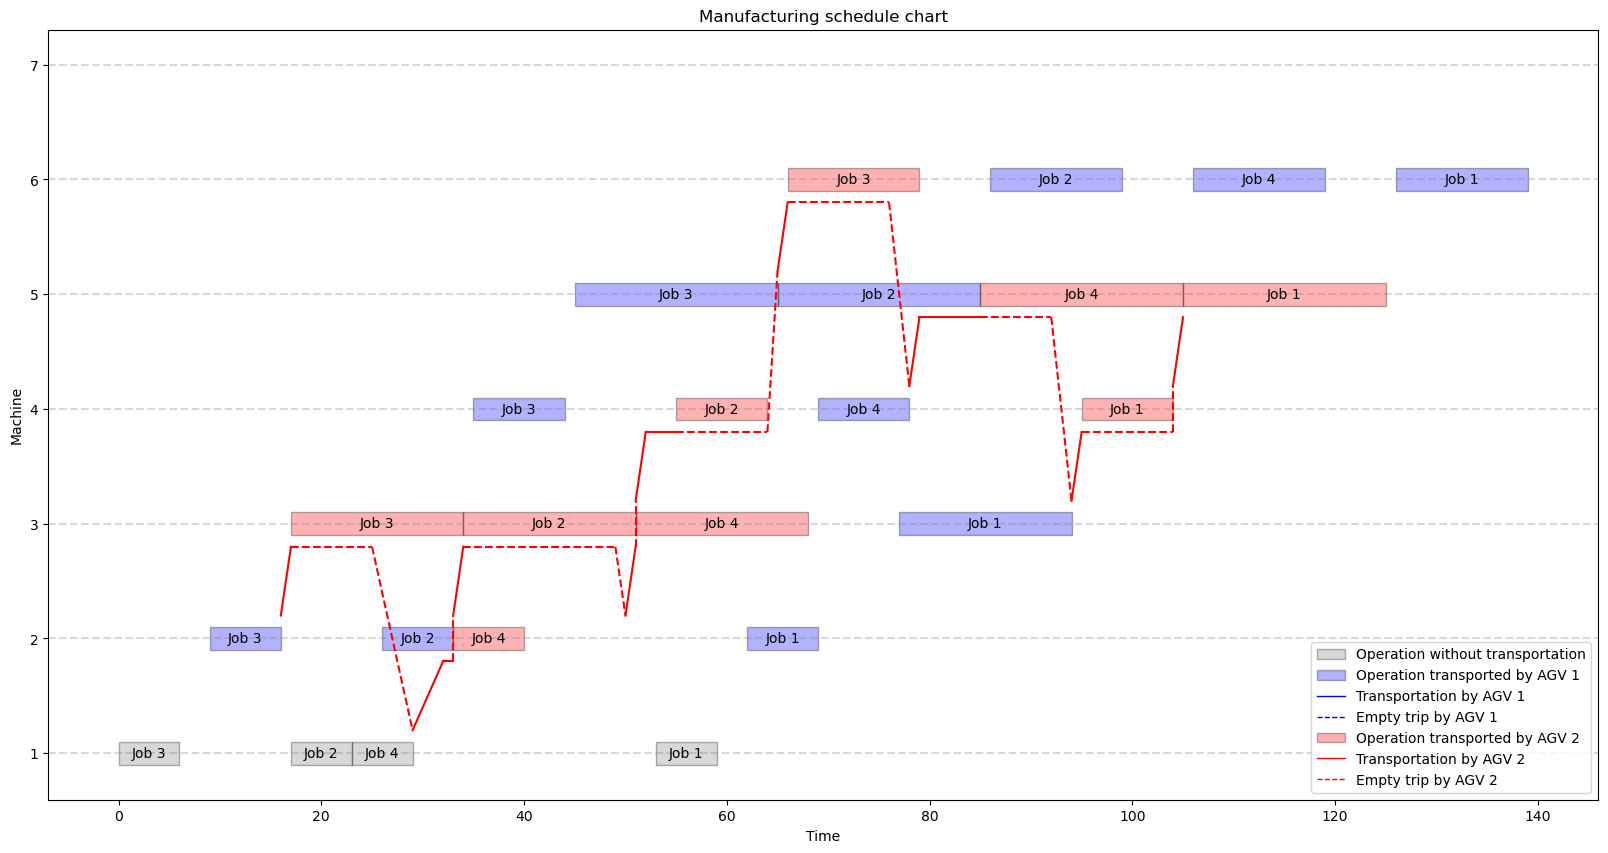

In [13]:
optimize_engine.log_result()
for k in range(input_set['input_data']['num_AGV'] + 1):
    optimize_engine.visualize_result(k)